In [44]:
from PIL import Image
from matplotlib import pyplot as plt
from glob import glob as glob

import numpy as np
import random
import cv2
import os

# 1. Demo of canal diameter length for one image

In [57]:
im_w_training = 256
im_h_training = 256

org_imgs = glob('../experiments/assignment_dataset/original_images/*')
lable_imgs = glob('../experiments/assignment_dataset/tagged_images/*')
pred_seg_imgs = glob('./prediction_seg/256by256/*')

In [70]:
index = random.randint(0,len(org_imgs))

img_org = cv2.imread(org_imgs[index],0)
img_org_resized = cv2.resize(img_org, (im_w_training,im_h_training), interpolation = cv2.INTER_CUBIC)
label_org = cv2.imread(lable_imgs[index],0)
label_org_resized = cv2.resize(label_org, (im_w_training,im_h_training), interpolation = cv2.INTER_CUBIC)
pred_seg = cv2.imread(pred_seg_imgs[index],0)

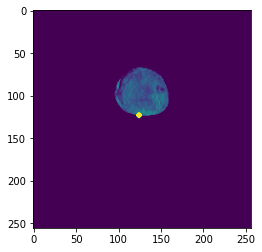

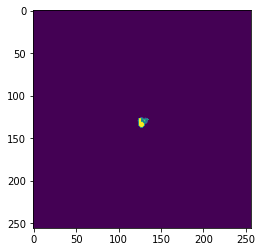

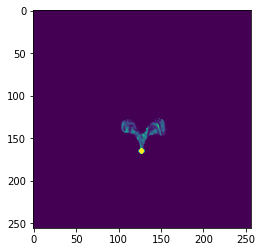

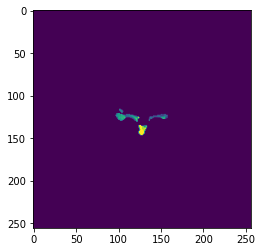

In [75]:
# 1) Intervertebral Disc (IVD) --> channel 1
# 2) Posterior Element (PE) --> channel 3
# 3) Thecal Sac (TS) and --> channel 2
# 4) the Area between Anterior and Posterior (AAP) vertebrae elements. --> channel 4

## TO FIND THE MIN POINT OF THE REGIONS


seg_channels = [1, 3, 2, 4]
final_points = []
for i in seg_channels:
    img_mask = (pred_seg == i)
    e = img_org_resized * img_mask
    val = np.where(img_mask == 1)
    x_s = []

    for index in range(0, len(val[0])):
        if val[0][index] == max(val[0]):
            x_s.append(index)

    f = cv2.circle(e, ((val[1][min(x_s)]), max(val[0])), 2, 255, 2)
    final_points.append(((val[1][min(x_s)]), max(val[0])))
    plt.show()
    plt.imshow(f)

predicted diameter in white line


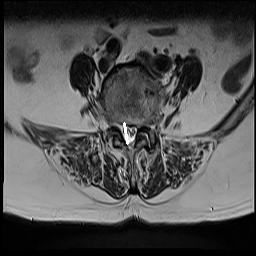

In [78]:
# Once we have image parts correctly segmented , we can use geometry to find the canal diameter
# We need to find the minimum point of the red area(Intervertebral Disc (IVD)) and the minimum point of the area between Anterior and Posterior (AAP) vertebrae elements (yellow area).
# The distance between these 2 points will be the canal diameter

final_img = cv2.line(img_org_resized, final_points[0], final_points[3], (255, 255), 2) 
print('predicted diameter in white line')
Image.fromarray(final_img)

predicted diameter in blue line


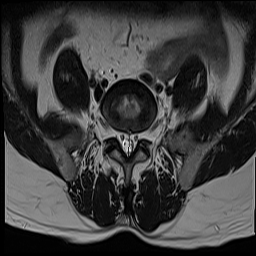

In [79]:
print('predicted diameter in blue line')
Image.fromarray(label_org_resized)

# 2. Save images with predicted diameter

In [80]:
for file_index in range(0, len(org_imgs)):
    img_org = cv2.imread(org_imgs[file_index], 0)
    img_org_resized = cv2.resize(img_org, (im_w_training, im_h_training),
                                 interpolation=cv2.INTER_CUBIC)
    label_org = cv2.imread(lable_imgs[file_index], 0)
    label_org_resized = cv2.resize(label_org, (im_w_training, im_h_training),
                                   interpolation=cv2.INTER_CUBIC)
    pred_seg = cv2.imread(pred_seg_imgs[file_index], 0)

    seg_channels = [1, 3, 2, 4]
    final_points = []
    
    for i in seg_channels:
        img_mask = (pred_seg == i)
        e = img_org_resized * img_mask
        val = np.where(img_mask == 1)
        x_s = []

        for index in range(0, len(val[0])):
            if val[0][index] == max(val[0]):
                x_s.append(index)
        final_points.append(((val[1][min(x_s)]), max(val[0])))

    final_img = cv2.line(img_org_resized, final_points[0], final_points[3],
                         (255, 255), 2)

    img_name = os.path.basename(org_imgs[file_index])
    cv2.imwrite('./final_test_output/' + img_name, final_img)